https://www.kaggle.com/datasets/dhrubangtalukdar/lung-cancer-prediction-dataset

## Data setup and importing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('lung_cancer.csv')

## Data inspection

In [6]:
df.columns

Index(['age', 'gender', 'education_years', 'income_level', 'smoker',
       'smoking_years', 'cigarettes_per_day', 'pack_years', 'passive_smoking',
       'air_pollution_index', 'occupational_exposure', 'radon_exposure',
       'family_history_cancer', 'copd', 'asthma', 'previous_tb',
       'chronic_cough', 'chest_pain', 'shortness_of_breath', 'fatigue', 'bmi',
       'oxygen_saturation', 'fev1_x10', 'crp_level', 'xray_abnormal',
       'exercise_hours_per_week', 'diet_quality', 'alcohol_units_per_week',
       'healthcare_access', 'lung_cancer_risk'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      5000 non-null   int64
 1   gender                   5000 non-null   int64
 2   education_years          5000 non-null   int64
 3   income_level             5000 non-null   int64
 4   smoker                   5000 non-null   int64
 5   smoking_years            5000 non-null   int64
 6   cigarettes_per_day       5000 non-null   int64
 7   pack_years               5000 non-null   int64
 8   passive_smoking          5000 non-null   int64
 9   air_pollution_index      5000 non-null   int64
 10  occupational_exposure    5000 non-null   int64
 11  radon_exposure           5000 non-null   int64
 12  family_history_cancer    5000 non-null   int64
 13  copd                     5000 non-null   int64
 14  asthma                   5000 non-null   int64
 15  prev

In [8]:
df.sample(5)

,age,gender,education_years,income_level,smoker,smoking_years,cigarettes_per_day,pack_years,passive_smoking,air_pollution_index,...,bmi,oxygen_saturation,fev1_x10,crp_level,xray_abnormal,exercise_hours_per_week,diet_quality,alcohol_units_per_week,healthcare_access,lung_cancer_risk
2982,63,0,10,2,0,0,0,0,1,84,...,25,100,32,0,0,6,1,4,5,0
2504,41,0,11,3,0,0,0,0,0,69,...,19,98,36,1,0,1,3,5,3,0
4502,35,0,13,2,1,0,35,0,1,82,...,24,99,35,1,0,1,2,6,2,0
4538,52,1,10,3,1,13,11,7,0,71,...,30,96,31,4,0,7,4,1,1,0
1538,40,0,13,1,1,14,1,0,1,88,...,25,97,36,3,0,3,3,10,2,0


## Checking for missing data and duplicates

In [10]:
df.isnull().sum()

age                        0
gender                     0
education_years            0
income_level               0
smoker                     0
smoking_years              0
cigarettes_per_day         0
pack_years                 0
passive_smoking            0
air_pollution_index        0
occupational_exposure      0
radon_exposure             0
family_history_cancer      0
copd                       0
asthma                     0
previous_tb                0
chronic_cough              0
chest_pain                 0
shortness_of_breath        0
fatigue                    0
bmi                        0
oxygen_saturation          0
fev1_x10                   0
crp_level                  0
xray_abnormal              0
exercise_hours_per_week    0
diet_quality               0
alcohol_units_per_week     0
healthcare_access          0
lung_cancer_risk           0
dtype: int64

In [11]:
df.nunique()

age                         73
gender                       2
education_years             16
income_level                 5
smoker                       2
smoking_years               49
cigarettes_per_day          42
pack_years                  57
passive_smoking              2
air_pollution_index        107
occupational_exposure        2
radon_exposure               2
family_history_cancer        2
copd                         2
asthma                       2
previous_tb                  2
chronic_cough                2
chest_pain                   2
shortness_of_breath          2
fatigue                      2
bmi                         22
oxygen_saturation           16
fev1_x10                    33
crp_level                   33
xray_abnormal                2
exercise_hours_per_week     11
diet_quality                 5
alcohol_units_per_week      24
healthcare_access            5
lung_cancer_risk             2
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df = df.drop_duplicates()

## Correlation Analysis using Heatmap

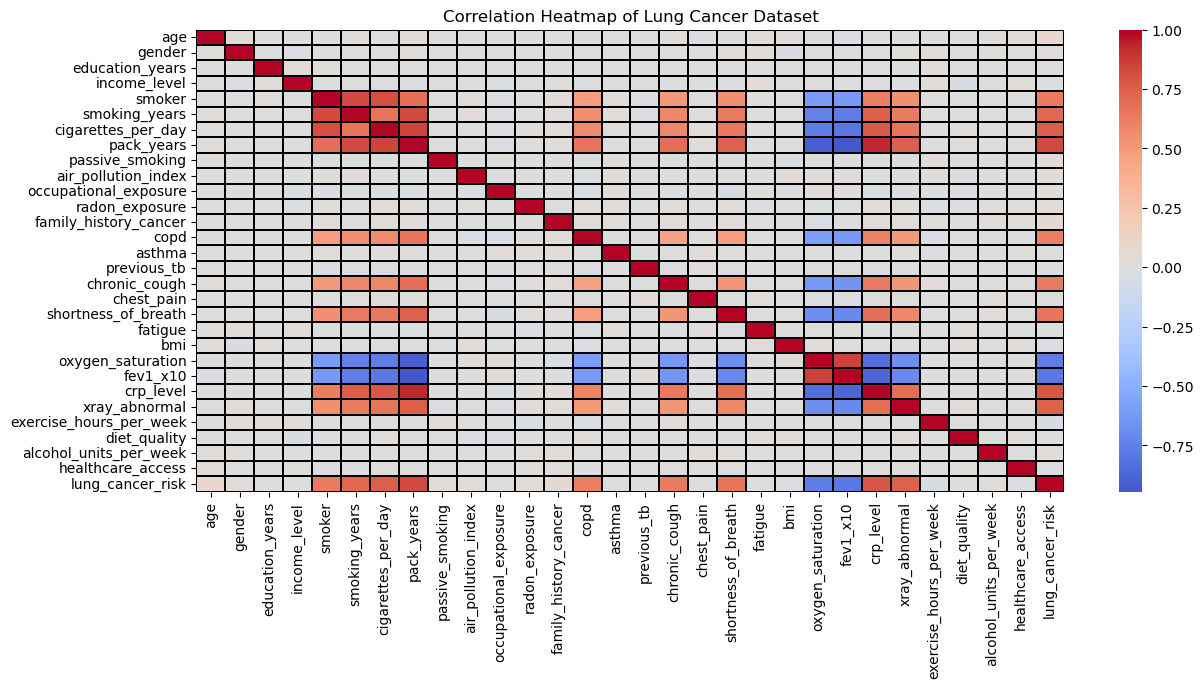

In [15]:
plt.figure(figsize=(14,6))

correlation = df.corr()

sns.heatmap(
    correlation,
    cmap = "coolwarm",
    center = 0,
    linewidths=0.3,
    linecolor = "black",
    annot = False)

plt.title("Correlation Heatmap of Lung Cancer Dataset")
plt.show()

## Plotting

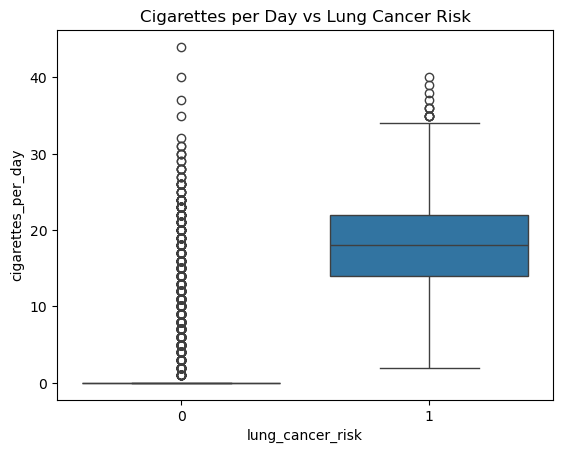

In [17]:
sns.boxplot(
    x = "lung_cancer_risk",
    y = "cigarettes_per_day",
    data = df
)

plt.title("Cigarettes per Day vs Lung Cancer Risk")
plt.show()

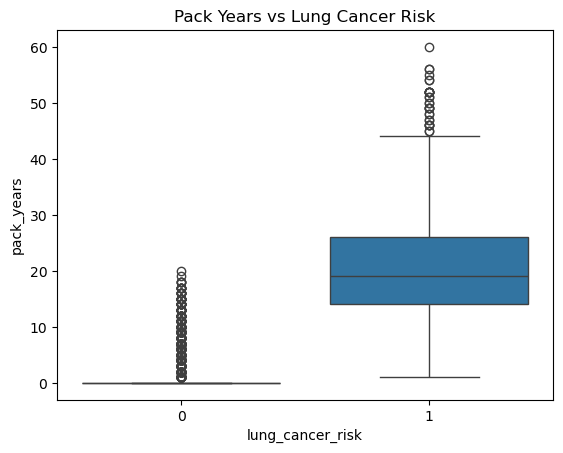

In [18]:
sns.boxplot(
    x = "lung_cancer_risk",
    y = "pack_years",
    data = df
)

plt.title("Pack Years vs Lung Cancer Risk")
plt.show()

## Feature and Target Split

In [20]:
X = df.drop(columns=["lung_cancer_risk"])
y = df["lung_cancer_risk"]

## Train/Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 42)

## Scaling

In [24]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [26]:
logistic_regression = LogisticRegression(max_iter=100)
logistic_regression.fit(X_train_scaled, y_train)

y_pred_log_reg = logistic_regression.predict(X_test_scaled)

print("Logistic Regression Analysis")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Analysis
Accuracy: 0.996
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       751
           1       0.99      0.99      0.99       249

    accuracy                           1.00      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       1.00      1.00      1.00      1000



## Random Forest

In [28]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

print("Random Forest Analysis")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Analysis
Accuracy: 0.967
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       751
           1       0.95      0.92      0.93       249

    accuracy                           0.97      1000
   macro avg       0.96      0.95      0.96      1000
weighted avg       0.97      0.97      0.97      1000



## Gradient Boosting

In [30]:
gradient_boosting = GradientBoostingClassifier(n_estimators = 300,
                                               learning_rate = 0.05,
                                               random_state = 42,
                                               max_features = 5)

gradient_boosting.fit(X_train, y_train)

y_pred_gb = gradient_boosting.predict(X_test)

print("Gradient Boosting Analysis")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Analysis
Accuracy: 0.979
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       751
           1       0.97      0.94      0.96       249

    accuracy                           0.98      1000
   macro avg       0.98      0.97      0.97      1000
weighted avg       0.98      0.98      0.98      1000



## Feature Importance

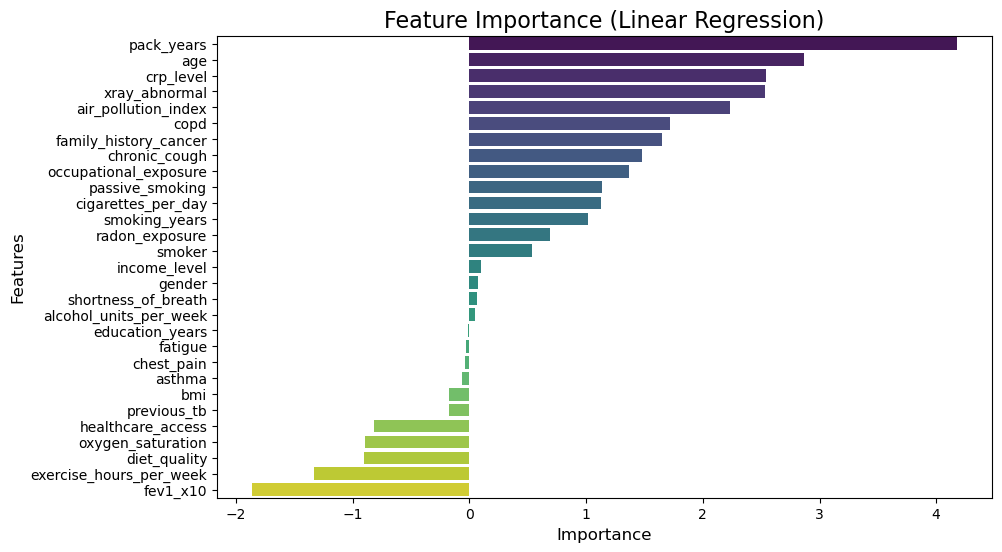

In [56]:
feature_importance = pd.Series(
    logistic_regression.coef_[0],
    index = X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')

plt.title('Feature Importance (Linear Regression)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

## Conclusion

- According to the feature importance graph, the positive coefficients represent a direct relationship with the outcome of lung cancer, while the negative coefficients represent an inverse relationship with the outcome.
- the length of the bars in the chart represents the magnitude of the features, pack_years, age, and crp_level are the greatest positive influences, whereas fev1_x10, exercise_hours_per_week, and diet_quality are the greatest negative influences.
- Environmental factors largely affect the possibility of an individual to have lung cancer.
- The best model to use to predict lung cancer is Logistic Regression, as it accurately identifies 99.6% of patients.
- Linear models outperforms non-linear models, suggesting large linear relationships between variables.